# Loading our MNIST dataset

In [60]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_test.shape)

(10000, 28, 28)


# Preparing dataset for training

In [61]:
img_rows=x_train[0].shape[0]
img_cols=x_train[1].shape[0]

x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

input_shape=(img_rows,img_cols,1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# One hot encode our labels

In [62]:
from keras.utils import np_utils

y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

print('Number of Classes: '+ str(y_test.shape[1]))

num_classes=y_test.shape[1]
num_pixels=x_train.shape[1] * x_train.shape[2]

Number of Classes: 10


# creating our model

In [63]:
import tensorflow.keras as keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
from tensorflow.keras import optimizers
from keras.utils import np_utils

#create model
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

# Train our model

In [64]:
batch_size=32
epochs=10
history=model.fit(x_train,
          y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test,y_test))

score=model.evaluate(x_test, y_test,verbose=0)
print('test loss:', score[0])
print('test accuracy:', score[1])

Epoch 1/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.3503 - accuracy: 0.8910 - val_loss: 0.0475 - val_accuracy: 0.9854
Epoch 2/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0775 - accuracy: 0.9773 - val_loss: 0.0370 - val_accuracy: 0.9879
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0539 - accuracy: 0.9840 - val_loss: 0.0323 - val_accuracy: 0.9898
Epoch 4/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0446 - accuracy: 0.9867 - val_loss: 0.0357 - val_accuracy: 0.9890
Epoch 5/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0349 - accuracy: 0.9889 - val_loss: 0.0337 - val_accuracy: 0.9900
Epoch 6/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0296 - accuracy: 0.9910 - val_loss: 0.0345 - val_accuracy: 0.9908
Epoch 7/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0259 - accuracy: 0.9913 - val_loss: 0.0255 -

# plotting our loss and accracy chart

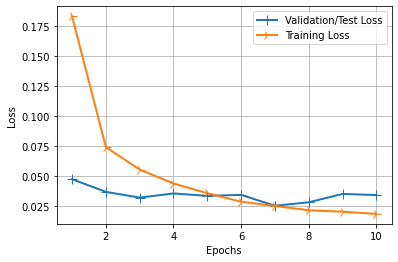

In [65]:
#plotting loss chart
import matplotlib.pyplot as plt
history_dict=history.history

loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values) + 1)

line1=plt.plot(epochs,val_loss_values,label='Validation/Test Loss')
line2=plt.plot(epochs,loss_values,label='Training Loss')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

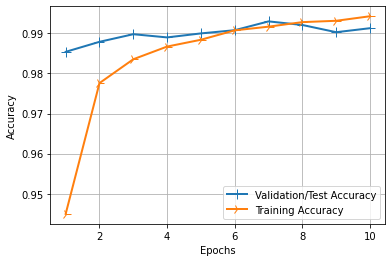

In [73]:
#plotting our accuracy charts
import matplotlib.pyplot as plt
history_dict=history.history

accuracy_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,len(loss_values) + 1)

line1=plt.plot(epochs,val_acc_values,label='Validation/Test Accuracy')
line2=plt.plot(epochs,accuracy_values,label='Training Accuracy')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [67]:
#saving our model
model.save("mnist_simple_cnn_10_epochs.h5")
print('model saved')

model saved


In [68]:
#loading our model
from keras.models import load_model
classifier=load_model("mnist_simple_cnn_10_epochs.h5")

In [69]:
import cv2
import numpy as np

def draw_test(name, pred, input_im):
    BLACK=[0,0,0]
    expanded_image=cv2.copyMakeBorder(input_im,0,0,0,imageL.shape[0],cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image=cv2.cvtColor(expanded_image,cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image,str(pred),(152,70),cv2.FONT_HERSHEY_COMPLEX_SMALL,4,(0,255,0),2)
    cv2.imshow(name,expanded_image)
    
for i in range(0,10):
    rand=np.random.randint(0,len(x_test))
    input_im=x_test[rand]
    
    imageL=cv2.resize(input_im, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)
    input_im=input_im.reshape(1,28,28,1)
    
    res=str(classifier.predict_classes(input_im, 1, verbose=0)[0])
    
    draw_test("Prediction", res, imageL)
    cv2.waitKey(0)

cv2.destroyAllWindows()